# Лабараторная работа 5

#### Сребродольский Денис Владимироваич А-13-23
#### Вариант 19

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
from typing import List, Tuple, Optional

### 5.1 Аппроксимация данных методом наименьших квадратов

Функция $y = f(x)$ задана таблицей значений в точках $x_0, x_1, \ldots, x_n$. Используя метод наименьших квадратов (МНК), найти многочлен $P_m(x) = a_0 + a_1x + \ldots + a_mx^m$ наилучшего среднеквадратичного приближения оптимальной степени $m = m^*$. За оптимальное значение $m^*$ принять ту степень многочлена, начиная с которой величина   стабилизируется или начинает возрастать.
$$
\sigma =  \sqrt{
\frac{1}{n - m} \sum_{k=0}^{n} \left( P_m(x_k) - y_k \right)^2}
$$  


**Таблица данных**

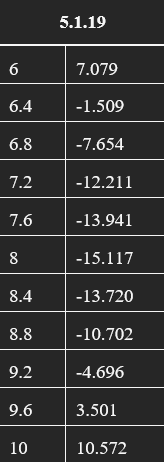

C:\Users\user\AppData\Local\Temp\ipykernel_2152\2087887304.py:39: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(np.sum((preds - y_data) ** 2) / dof)


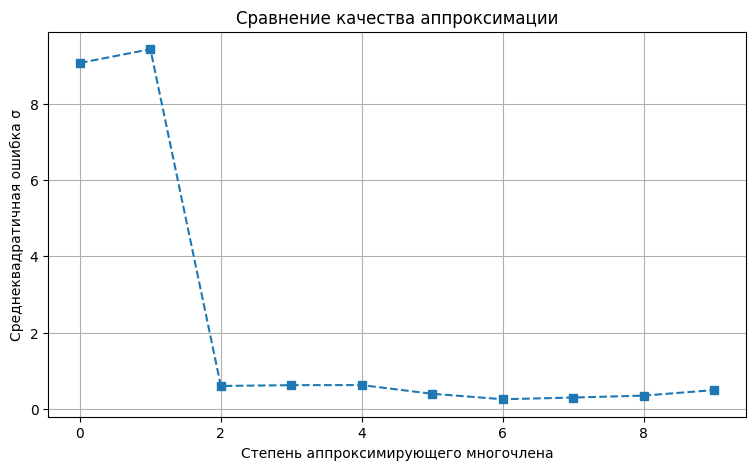

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Исходные экспериментальные точки
X = np.array([6.0, 6.4, 6.8, 7.2, 7.6, 8.0, 8.4, 8.8, 9.2, 9.6, 10.0])
Y = np.array([7.079, -1.509, -7.654, -12.211, -13.941, -15.117, -13.720, -10.702, -4.696, 3.501, 10.572])


# Функция: построение системы нормальных уравнений
def normal_system(points_x, points_y, degree):
    k = degree + 1
    mat = np.zeros((k, k))
    vec = np.zeros(k)
    
    powers = [np.sum(points_x**p) for p in range(2 * degree + 1)]
    
    for i in range(k):
        for j in range(k):
            mat[i, j] = powers[i + j]
        vec[i] = np.sum(points_y * (points_x**i))
    return mat, vec


# Поиск коэффициентов полинома через решение СЛАУ
def poly_fit(x_data, y_data, degree):
    A, b = normal_system(x_data, y_data, degree)
    return np.linalg.solve(A, b)


# Вычисление значений полинома
def eval_poly(xx, coeffs):
    return sum(c * xx**i for i, c in enumerate(coeffs))


# Подсчёт среднеквадратичного отклонения ошибки
def rms_error(x_data, y_data, coeffs, degree):
    preds = eval_poly(x_data, coeffs)
    dof = len(x_data) - (degree + 1)  # число степеней свободы
    return np.sqrt(np.sum((preds - y_data) ** 2) / dof)

max_deg = 10
errors = []
deg_list = range(max_deg + 1)

for d in deg_list:
    coeffs = poly_fit(X, Y, d)
    sigma_val = rms_error(X, Y, coeffs, d)
    errors.append(sigma_val)

plt.figure(figsize=(9, 5))
plt.plot(deg_list, errors, marker="s", linestyle="--", linewidth=1.5)
plt.xlabel("Степень аппроксимирующего многочлена")
plt.ylabel("Среднеквадратичная ошибка σ")
plt.title("Сравнение качества аппроксимации")
plt.grid()
plt.show()

In [30]:
best_deg = int(np.argmin(errors))
best_sigma = errors[best_idx]

print(f"\nОптимальный многочлен степени {best_deg}:")
print(f"Значение σ: {best_sigma:.4f}")


Оптимальный многочлен степени 6:
Значение σ: 0.2569


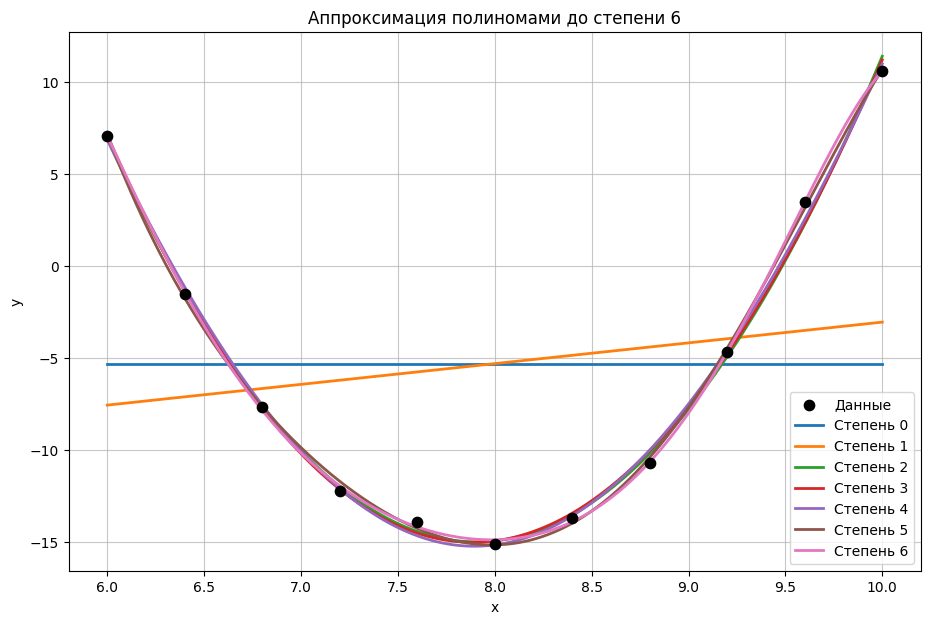

In [31]:
xx_dense = np.linspace(X.min(), X.max(), 400)

plt.figure(figsize=(11, 7))
plt.scatter(X, Y, c="k", s=55, label="Данные", zorder=3)

for d in range(best_deg + 1):
    coeffs = poly_fit(X, Y, d) 
    curve = [eval_poly(val, coeffs) for val in xx_dense]
    plt.plot(xx_dense, curve, lw=2, label=f"Степень {d}")

plt.title(f"Аппроксимация полиномами до степени {best_deg}")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha=0.7)
plt.legend()
plt.show()

### 5.2

Дана функция $y = 9cos(e^x)$ Приблизить функцию методом интерполяции, используя многочлен Лагранжа. Степень $N$ подобрать таким образом, чтобы максимальная величина погрешности на отрезке $[1,1.28]$ не превышала заданной величины $\varepsilon = 0.001$. Построить графики многочленов и графики погрешностей.


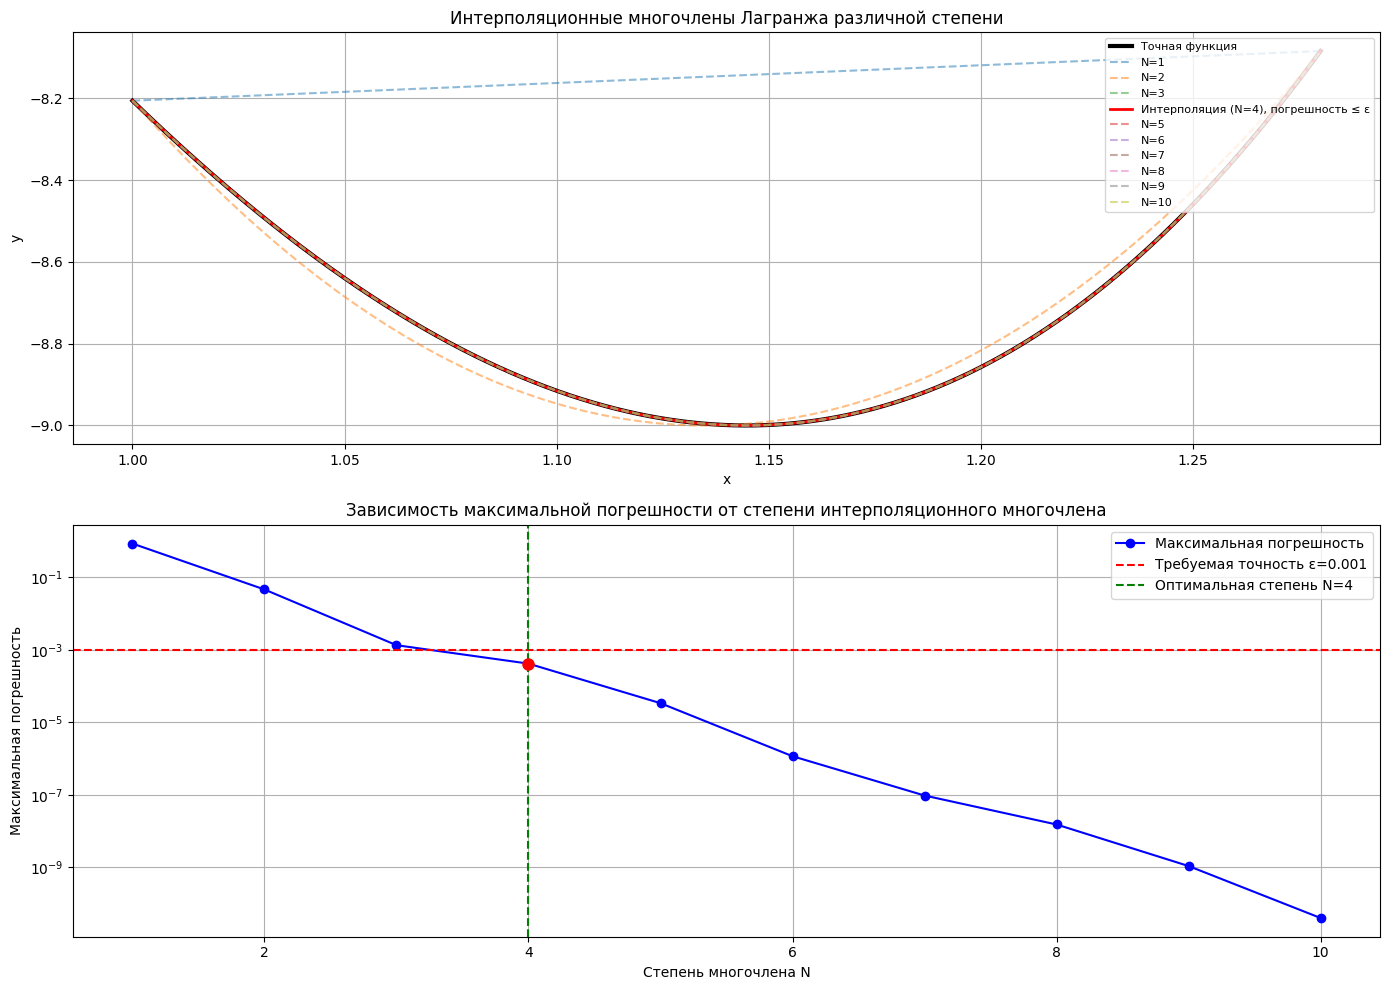

Оптимальная степень многочлена N = 4
Максимальная погрешность при N=4: 0.000416


In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Исходная функция
def f(x):
    return 9 * np.cos(np.exp(x))

# Генерация узлов интерполяции (равномерное распределение)
def generate_uniform_nodes(a, b, n):
    return np.linspace(a, b, n + 1)

# Интерполяционный многочлен Лагранжа
def lagrange_interpolation(x, x_nodes, y_nodes):
    n = len(x_nodes)
    p = 0
    for i in range(n):
        L = 1
        for j in range(n):
            if i != j:
                L *= (x - x_nodes[j]) / (x_nodes[i] - x_nodes[j])
        p += y_nodes[i] * L
    return p

# Параметры задачи
a, b = 1.0, 1.28
epsilon = 0.001
max_n = 10  # Максимальная степень для перебора

# Создаем сетку для оценки погрешности
x_test = np.linspace(a, b, 1000)
y_exact = f(x_test)

# Перебираем степени многочленов и вычисляем погрешности
errors = []
optimal_n = None

plt.figure(figsize=(14, 10))

# График 1: Все интерполяционные многочлены
plt.subplot(2, 1, 1)
plt.plot(x_test, y_exact, 'k-', linewidth=3, label='Точная функция')

for n in range(1, max_n + 1):
    x_nodes = generate_uniform_nodes(a, b, n)
    y_nodes = f(x_nodes)
    y_interp = lagrange_interpolation(x_test, x_nodes, y_nodes)
    
    # Вычисляем максимальную погрешность
    error = np.max(np.abs(y_exact - y_interp))
    errors.append(error)
    
    # Проверяем, достигнута ли требуемая точность
    if error <= epsilon and optimal_n is None:
        optimal_n = n
        plt.plot(x_test, y_interp, 'r-', linewidth=2, label=f'Интерполяция (N={n}), погрешность ≤ ε')
    else:
        plt.plot(x_test, y_interp, '--', alpha=0.5, label=f'N={n}')

plt.title('Интерполяционные многочлены Лагранжа различной степени')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right', fontsize=8)
plt.grid(True)

# График 2: Зависимость максимальной погрешности от степени многочлена
plt.subplot(2, 1, 2)
plt.semilogy(range(1, max_n + 1), errors, 'bo-', label='Максимальная погрешность')
plt.axhline(y=epsilon, color='r', linestyle='--', label=f'Требуемая точность ε={epsilon}')

plt.axvline(x=optimal_n, color='g', linestyle='--', label=f'Оптимальная степень N={optimal_n}')
plt.plot(optimal_n, errors[optimal_n-1], 'ro', markersize=8)

plt.title('Зависимость максимальной погрешности от степени интерполяционного многочлена')
plt.xlabel('Степень многочлена N')
plt.ylabel('Максимальная погрешность')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Оптимальная степень многочлена N = {optimal_n}")
print(f"Максимальная погрешность при N={optimal_n}: {errors[optimal_n-1]:.6f}")

## 5.3

Выполнить  интерполяцию функции, заданной в таблице 5.1 указанным в индивидуальном варианте методом (Квадратичный сплайн с дополнительным условием $y'(x_0)=0$)

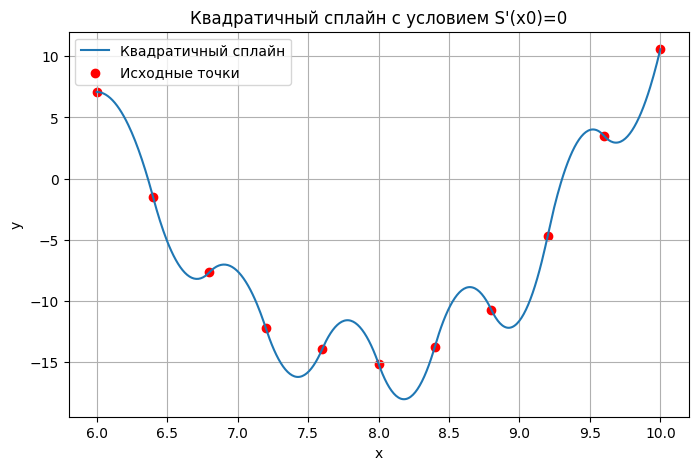

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Исходные данные (узлы интерполяции)
X = np.array([6.0, 6.4, 6.8, 7.2, 7.6, 8.0, 8.4, 8.8, 9.2, 9.6, 10.0])
Y = np.array([7.079, -1.509, -7.654, -12.211, -13.941, -15.117, -13.720, -10.702, -4.696, 3.501, 10.572])

# Вычисление длин отрезков между узлами и первых разностей
def compute_step_and_slopes(X, Y):
    """
    Вычисляет:
    - h: длины интервалов между соседними узлами
    - slope: угловые коэффициенты (разности) на каждом интервале
    """
    h = X[1:] - X[:-1]                   # длины интервалов
    slope = (Y[1:] - Y[:-1]) / h         # угловые коэффициенты секущих
    return h, slope

# Решение для коэффициентов c (квадратичные члены сплайна)
def compute_quadratic_coeffs(X, Y, h, slope):
    """
    Находит коэффициенты c[i] для каждого интервала сплайна.
    Используется условие S'(x0) = 0 (производная в начале равна нулю).
    """
    m = len(h)                     # количество интервалов
    c = np.zeros(m)                 # массив коэффициентов c
    
    # Граничное условие: S'(x0) = 0 => c0 выражается напрямую
    c[0] = (Y[1] - Y[0]) / (h[0]**2)

    # Формируем СЛАУ для c[1..m-1]
    A = np.zeros((m-1, m-1))        # матрица коэффициентов
    rhs = np.zeros(m-1)             # правая часть
    for i in range(m-1):
        if i > 0:
            A[i, i-1] = h[i]        # поддиагональ
        A[i, i] = h[i+1]            # диагональ
        rhs[i] = slope[i+1] - slope[i]
    rhs[0] -= h[0] * c[0]           # учитываем граничное условие

    # Решаем систему и дополняем массив c
    c[1:] = np.linalg.solve(A, rhs)
    return c

# Вычисление коэффициентов a и b (свободный член и линейная часть)
def compute_linear_coeffs(X, Y, h, c):
    """
    Находит коэффициенты a[i] и b[i] для каждого интервала.
    Сплайн на каждом интервале имеет вид:
        S(x) = a[i] + b[i]*(x - X[i]) + c[i]*(x - X[i])^2
    """
    a = Y[:-1].copy()                                # свободные коэффициенты
    b = (Y[1:] - Y[:-1] - c * h**2) / h              # линейные коэффициенты
    return a, b


def evaluate_spline(x, X, a, b, c):
    m = len(a)
    if x <= X[0]:
        i = 0
    elif x >= X[-1]:
        i = m - 1
    else:
        i = np.searchsorted(X, x) - 1

    dx = x - X[i]
    return a[i] + b[i] * dx + c[i] * dx**2

def interpolate(X, Y):
    # 1. Находим шаги и разности
    h, slope = compute_step_and_slopes(X, Y)
    # 2. Решаем для коэффициентов c
    c = compute_quadratic_coeffs(X, Y, h, slope)
    # 3. Находим коэффициенты a и b
    a, b = compute_linear_coeffs(X, Y, h, c)
    return a, b, c



a, b, c = interpolate(X, Y)
# 4. Строим график сплайна
xx = np.linspace(X[0], X[-1], 500)
yy = np.array([evaluate_spline(x, X, a, b, c) for x in xx])

plt.figure(figsize=(8, 5))
plt.plot(xx, yy, label="Квадратичный сплайн")
plt.scatter(X, Y, color='red', label="Исходные точки")
plt.title("Квадратичный сплайн с условием S'(x0)=0")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


Вывод: мы достинги поставленных задач, успешно применив несколько разных методов интерполяции функций.